# IS 455 - Data Visualization
## Programming Assignment 3 - Rashmi Chhabria

In [1]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets

In [2]:
# Reading the UFO sightings dataset:
ufo = pd.read_csv('https://github.com/UIUC-iSchool-DataViz/is445_AOUAOG_fall2021/raw/master/week05/data/ufo-scrubbed-geocoded-time-standardized-00.csv',\
                  names = ['Datetime', 'City', 'State', 'Country', 'Shape', 'Duration_seconds', 'Duration', 'Description', 'Date', 'Latitude', 'Longitude'],
                 dtype = {'Latitude': 'float', 'Longitude': 'float'})

In [3]:
# Correcting Not-A-Number issues
ufo = ufo.fillna({'Country':'unknown', 'State': 'unknown', 'Shape':'unknown'})

In [4]:
# Checking if there are any NaN values yet
ufo.isnull() == True

,Datetime,City,State,Country,Shape,Duration_seconds,Duration,Description,Date,Latitude,Longitude
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
80327,False,False,False,False,False,False,False,False,False,False,False
80328,False,False,False,False,False,False,False,False,False,False,False
80329,False,False,False,False,False,False,False,False,False,False,False
80330,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# Grouping the UFO sightings by country
ufo_by_country = ufo.groupby(['Country']).size()

In [6]:
# Displaying the Number of UFO Sightings by Country
ufo_by_country

Country
au           538
ca          3000
de           105
gb          1905
unknown     9670
us         65114
dtype: int64

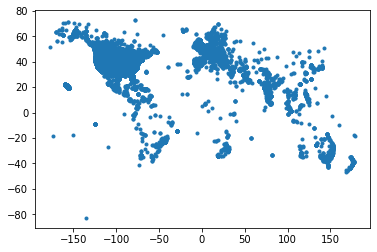

In [7]:
# Plotting all the UFO Sightings
plt.plot(ufo['Longitude'],ufo['Latitude'],'.')
plt.show()

In [8]:
# Interactive visualization that shows UFO Sightings by Country
@widgets.interact(Country = ['No Selection', 'Australia', 'Canada', 'Germany', 'United Kingdom', 'United States', 'Not Specified'])
def plot_sightings(Country):
    country_name = Country
    country_abv = {'No Selection': 'no selection', 'Australia': 'au', 'Canada': 'ca', 'Germany': 'de', 'United Kingdom': 'gb', 'United States': 'us', 'Not Specified': 'unknown'}
    Country = country_abv[country_name]
    ufo_country = ufo[ufo['Country'] == Country]
    ufo_non_country = ufo[ufo['Country'] != Country]
    print("Number of UFO Sightings in " + country_name + ": " + str(ufo_country.size))
    print("These are highlighted in turquoise on the map below:")
    plt.figure(figsize=(15,6))
    plt.title("UFO Sightings in the World")
    plt.plot(ufo_non_country['Longitude'],ufo_non_country['Latitude'],'.', color='lightpink')
    plt.plot(ufo_country['Longitude'],ufo_country['Latitude'],'.', color='turquoise')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

interactive(children=(Dropdown(description='Country', options=('No Selection', 'Australia', 'Canada', 'Germany…

Explanation:
I found the map to be quite interesting and the selection of country through drop down was fun to pick from, giving me a chance to play with the colors. Though to display the total count of UFO sightings in that country, I chose to print it as normal text depending on the Country selection, keeping it interactive too.